<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/MEGHA4training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4

#TRAINING MODELS

Until now, we have discussed about regression and classification models without knowing their implementation details. But having a good understanding of how things work can help to pick the appropriate model, right training algorithm to use, and a good set of hyperparameters.

In this chapter, we will start by looking at the Linear Regression model,

There are two different ways to train it:

1. Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set.

2. Using an iterative optimization approach, called Gradient Descent (GD)

#LINEAR REGRESSION

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)

#Linear Regression model prediction Equation

y = θ0 +θ1x1 +θ2x2 +⋯+θnxn

#Linear Regression model prediction (vectorized form)


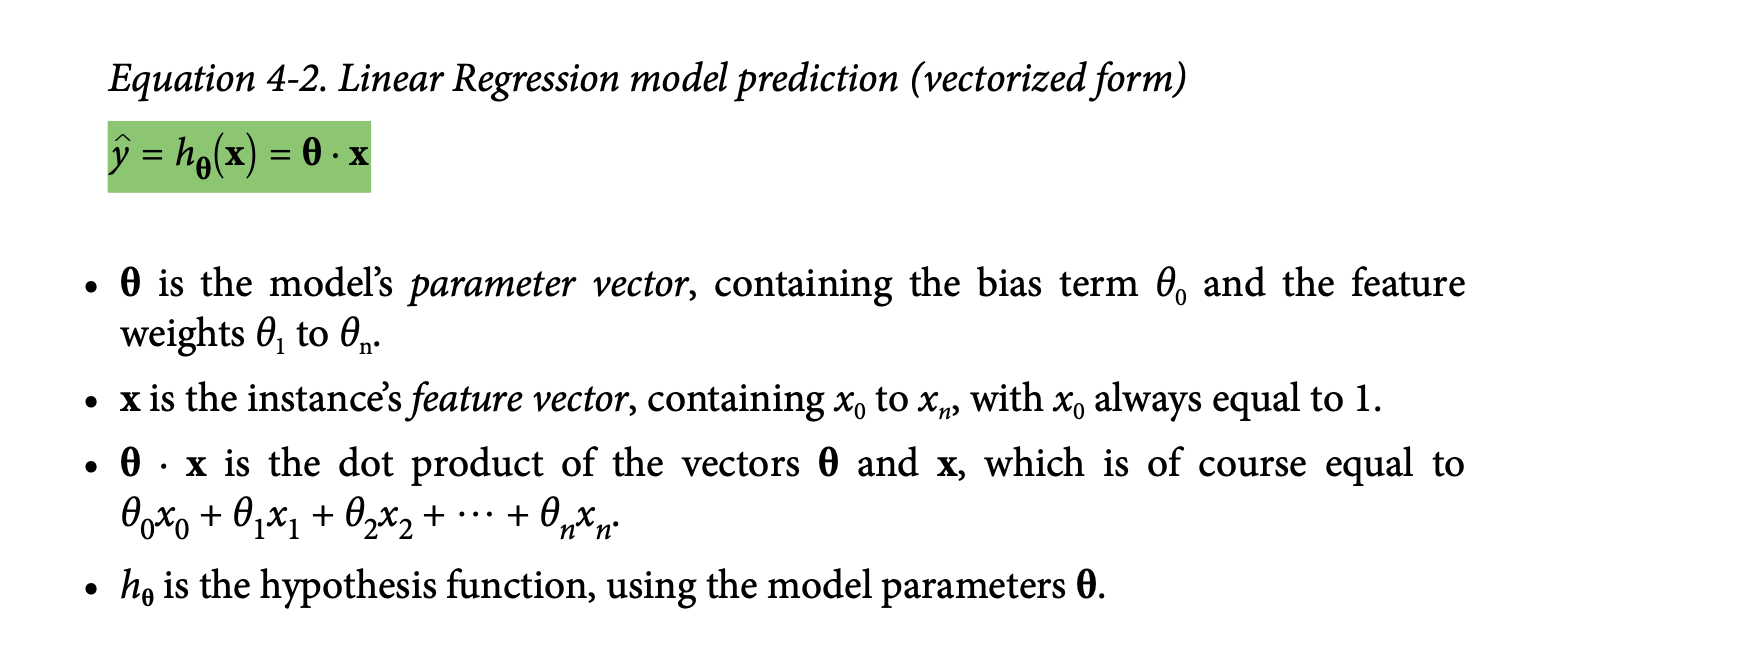

#Training a Linear Regression model

Training a model means setting its parameters so that the model best fits the training set.

The most common performance measure of a regression model is the Root Mean Square Error (RMSE) 

Therefore, to train a Linear Regression model, you need to find the value of θ (model’s parameter vector) that minimizes the RMSE.

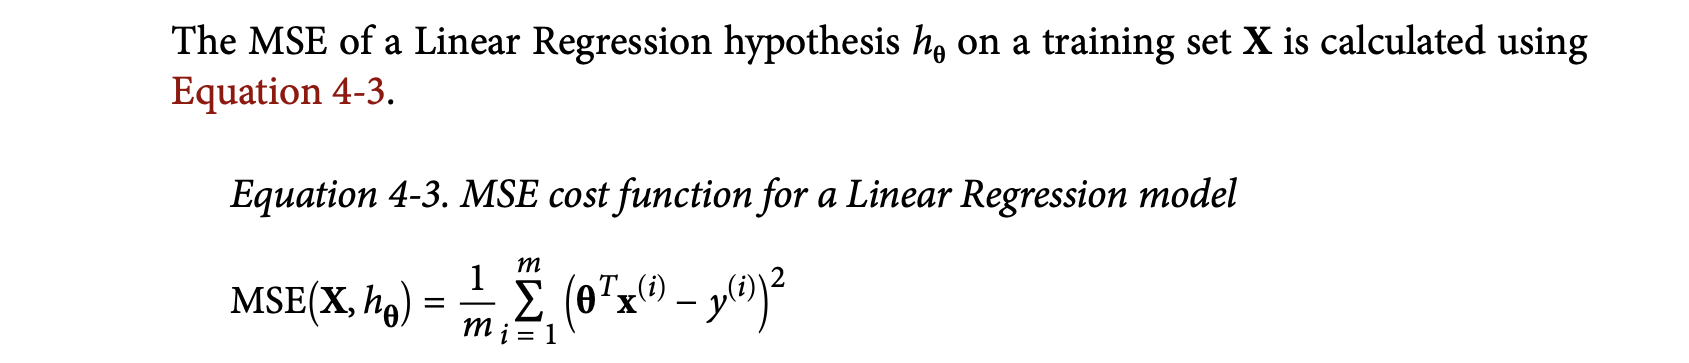

#Setup

In [46]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#First approach to train linear regression model- The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution, called the Normal Equation 


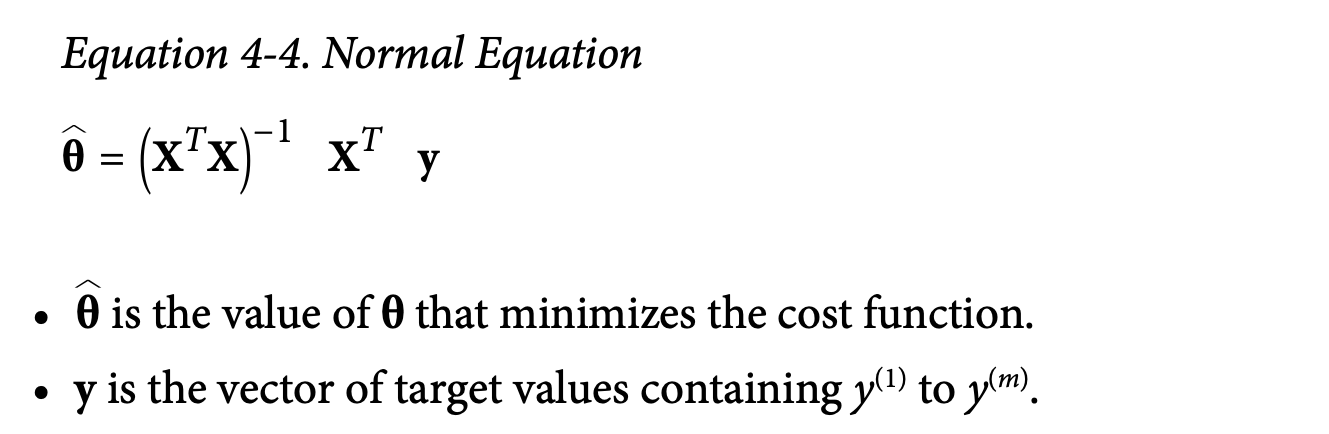

In [47]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


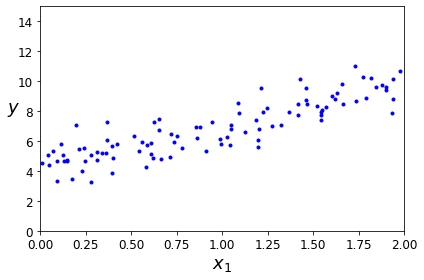

In [48]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Let’s compute θ using the Normal Equation. We will use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [49]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [50]:
theta_best

array([[4.21509616],
       [2.77011339]])

#Making predictions using θ:

In [51]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

#Plotting this model’s predictions 

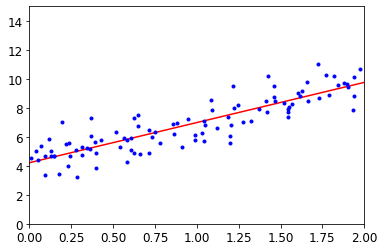

In [52]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#Performing linear regression using Scikit-Learn

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [54]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly:

In [55]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

#Using np.linalg.pinv() to compute the pseudoinverse directly:

You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [56]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

The pseudoinverse itself is computed using a "standard matrix factorization technique" called Singular Value Decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices U Σ VT (numpy.linalg.svd()).

To compute the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix.

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: 
indeed, the Normal Equation may not work if the matrix is not invertible (i.e., singular), or if some features are redundant, but the pseudoinverse is always defined.

#COMPUTATIONAL COMPLEXITY

The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n3)- where n is the number of features.

The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n2).

Therefore, in both the approches the computational complexity wrt No of features is Polynomial.


On the positive side, both are linear with regards to the number of instances in the training set O(m)


Once you have trained your Linear Regression model, the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features.

#GRADIENT DESCENT

It is a better appraoch to train Linear Regression Model when there are large number of features, or too many training instances to fit in memory.

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems.
The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

It measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient.

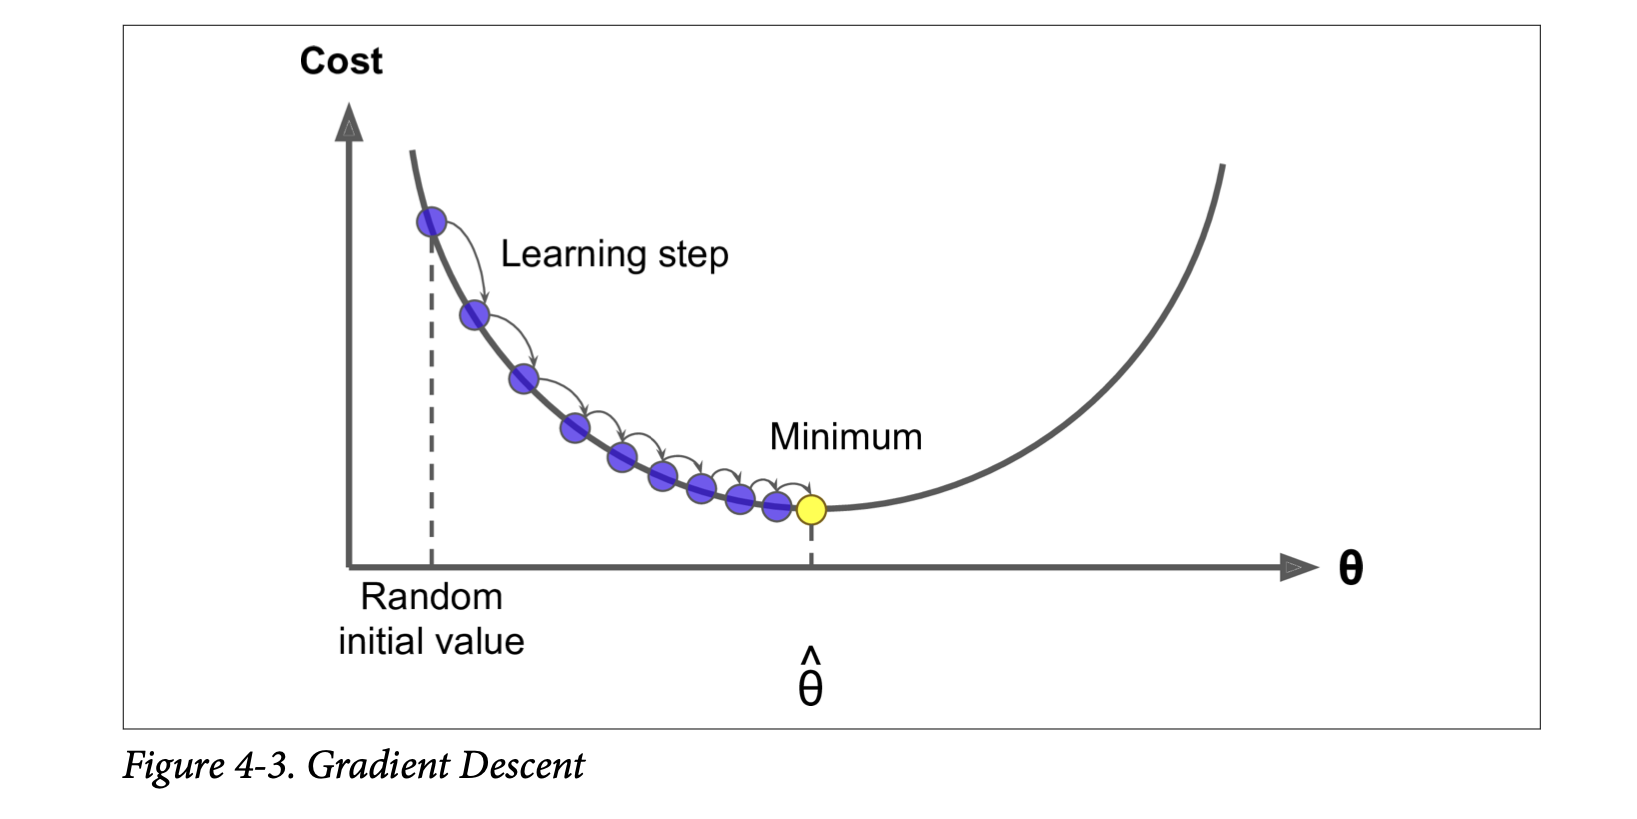

You start by filling θ with random values (called random initialization), and then you improve it gradually, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum

An important parameter in Gradient Descent is the size of the steps, determined by the LEARNING RATE HYPERPARAMETER.

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.


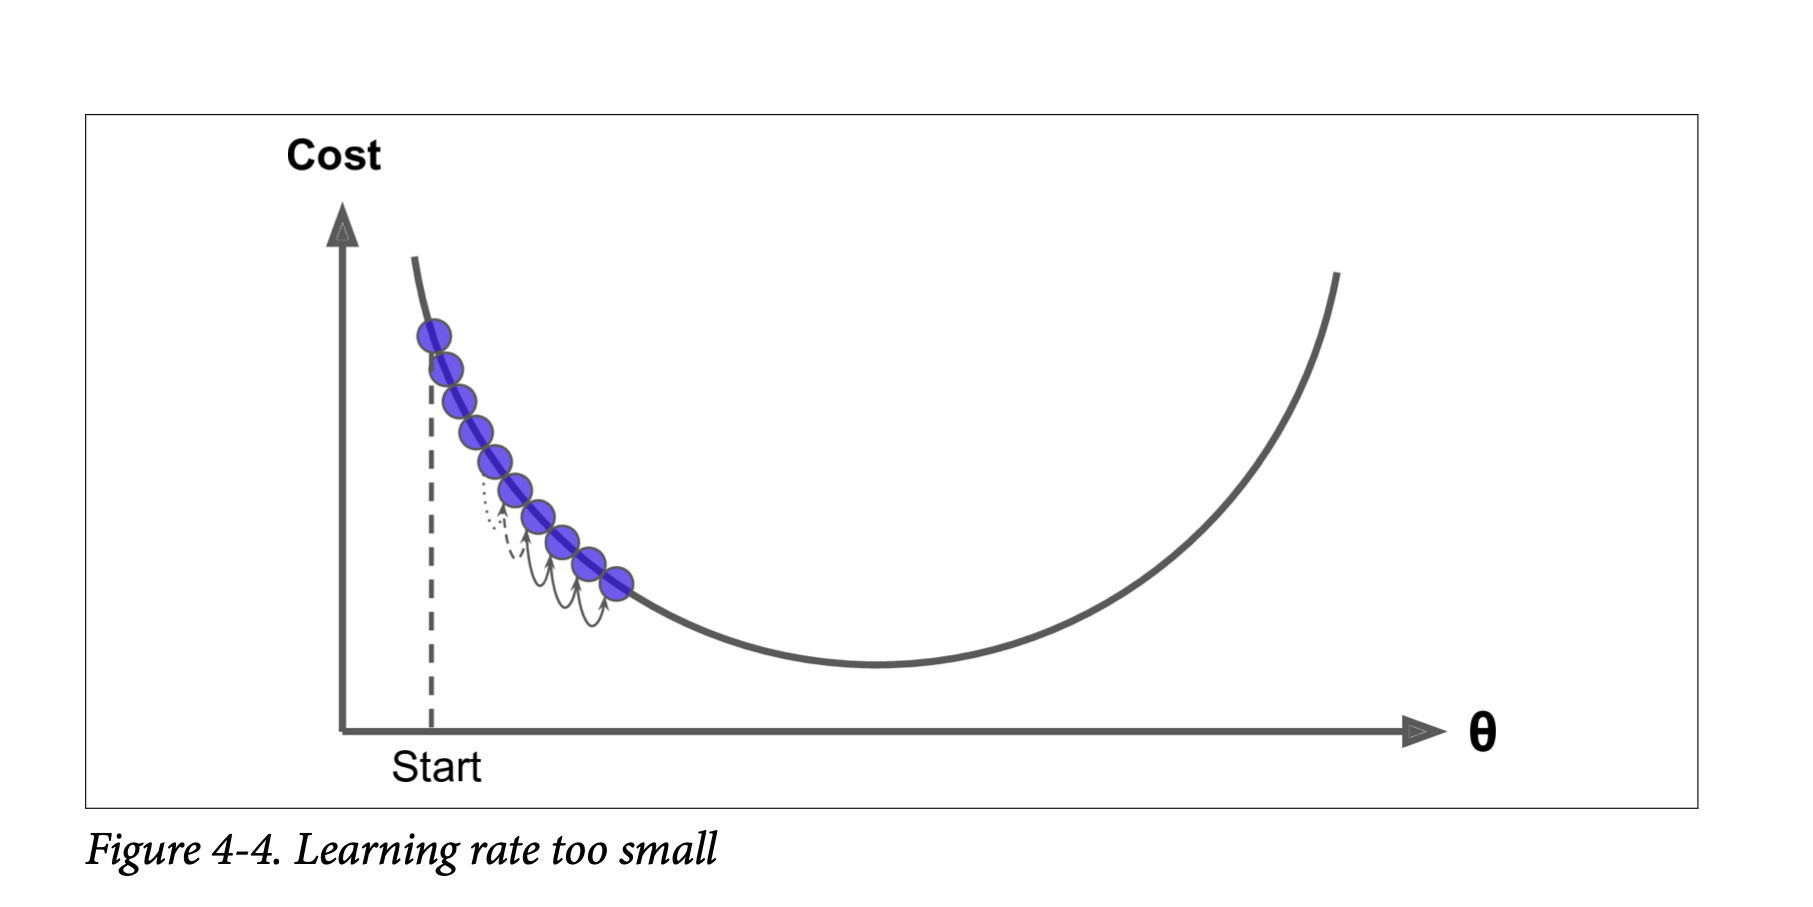

On the other hand, if the learning rate is too high, it might make the algorithm diverge, with larger and larger values, failing to find a good solution.

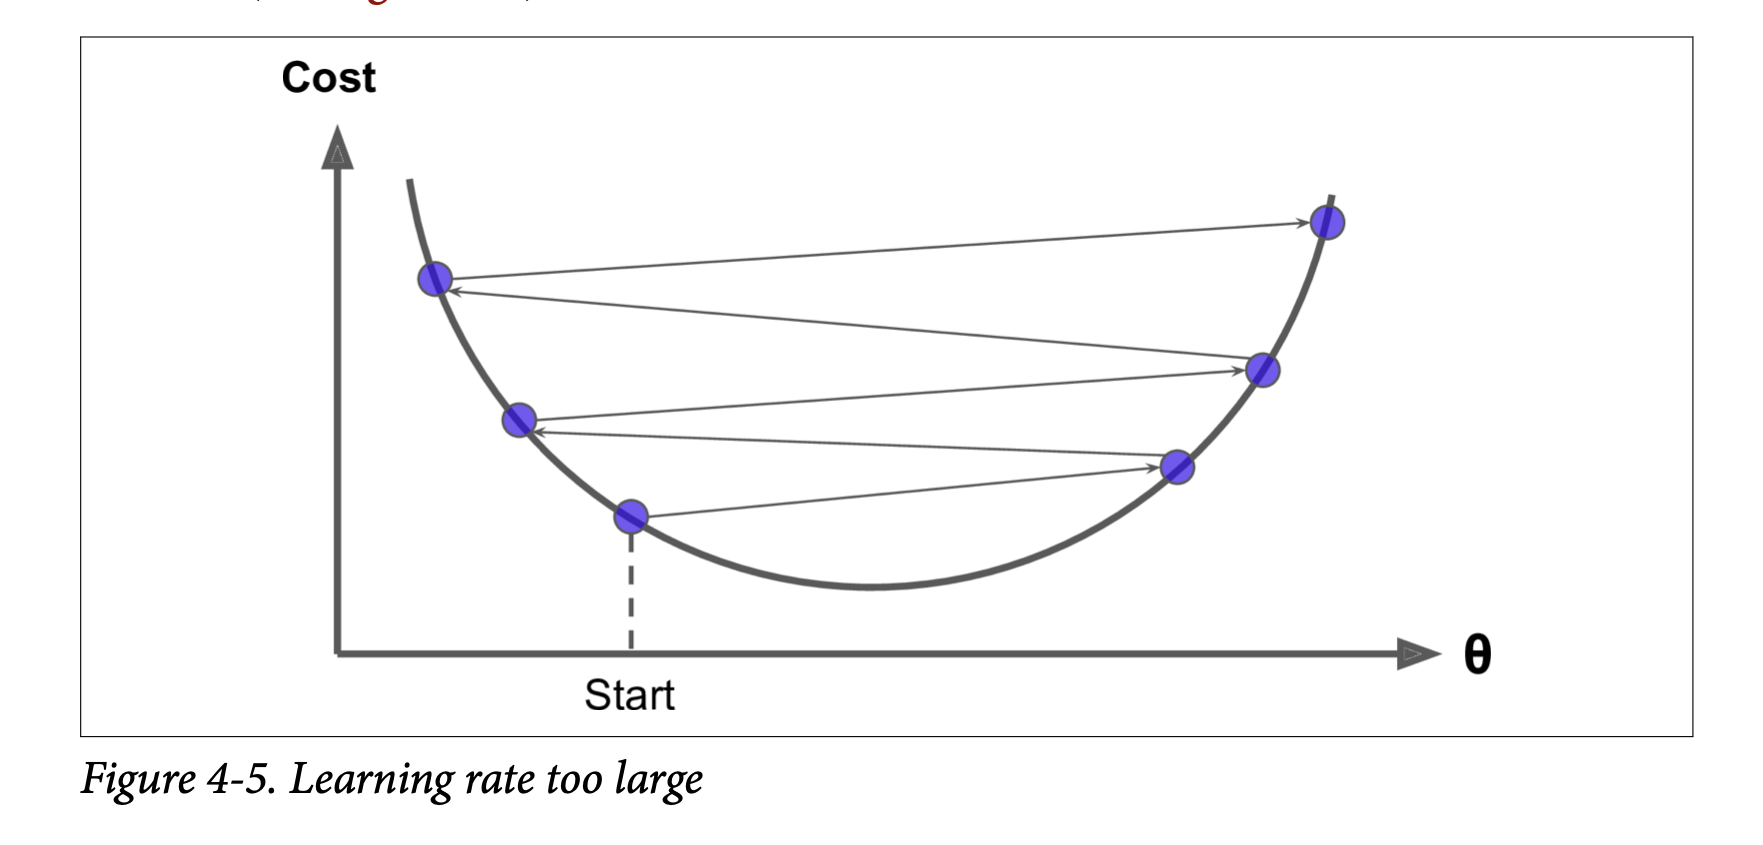

The two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. 

If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

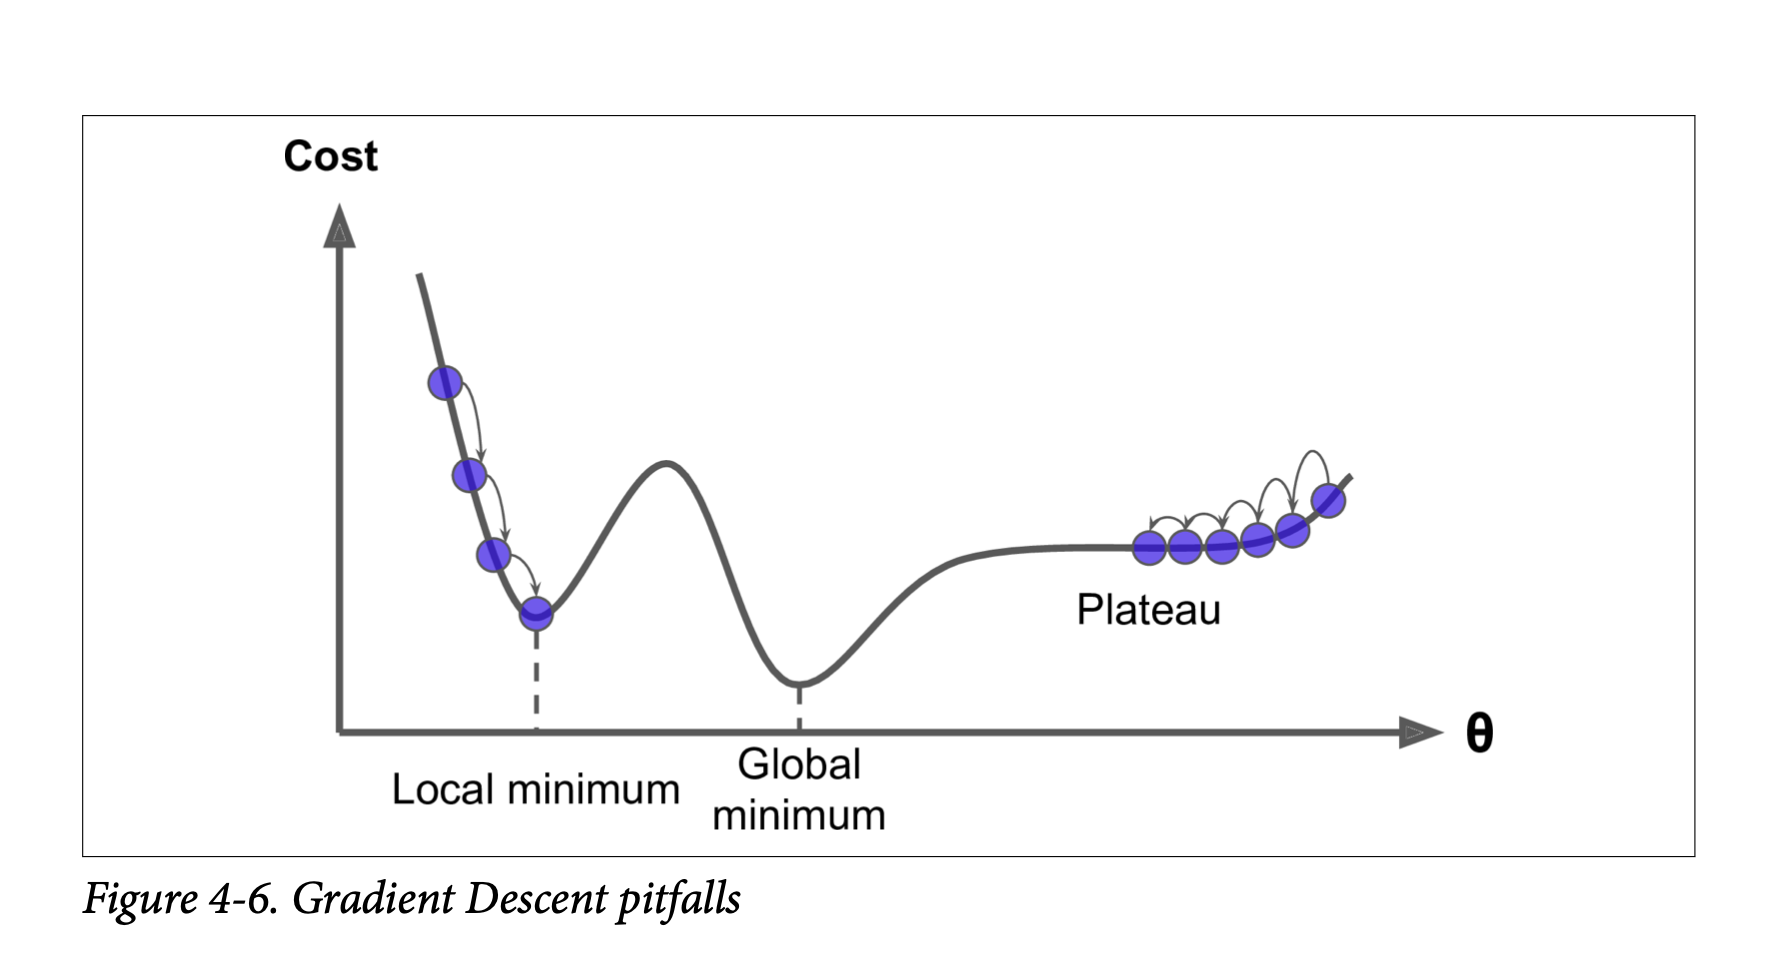


Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve.

This implies that there are no local minima, just one global minimum.
It is also a continuous function with a slope that never changes abruptly.

# The cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales.

Figure 4-7 shows Gradient Descent on a training set where features 1 and 2 have the same scale (left), and on a training set where feature 1 has much smaller values than feature 2 (right).

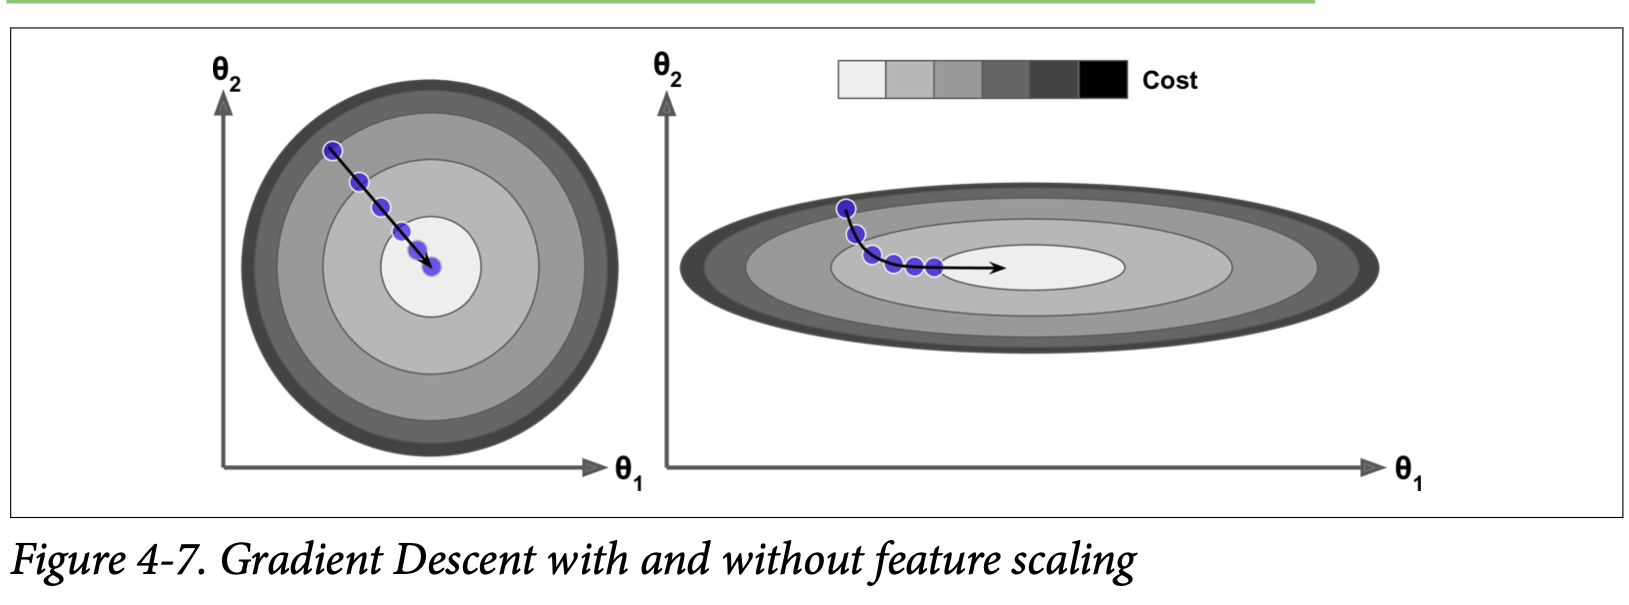

Therefore, when using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set).

It is a search in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is. 

#Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost func‐ tion with regards to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative.

Instead of computing these partial derivatives individually, you can use Equation 4-6 to compute them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial derivatives of the cost function (one for each model parameter).

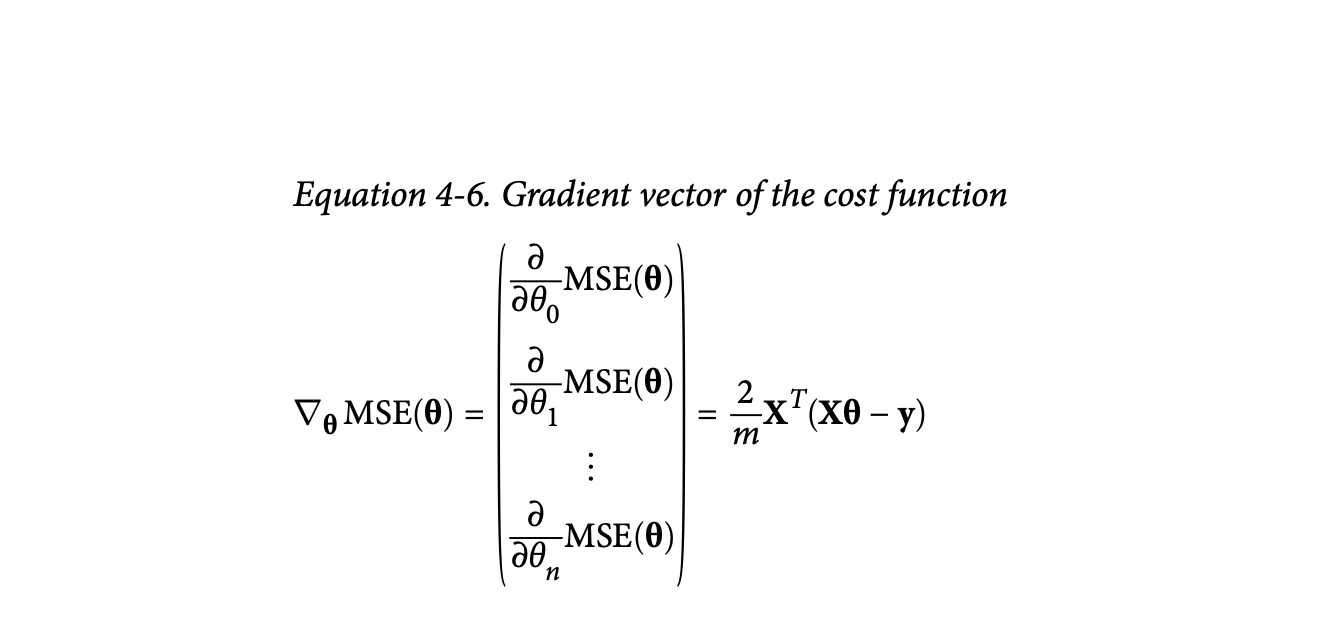

This formula involves calculations over the full training set X, at each Gradient Descent step. This is why the algorithm is called Batch Gradient Descent. As a result it is terribly slow on very large training sets.

However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hun‐ dreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Once you have the gradient vector, which points uphill, just go in the opposite direc‐ tion to go downhill.

In [57]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [58]:
theta

array([[4.21509616],
       [2.77011339]])

In [59]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [60]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

That’s exactly what the Normal Equation found! Gradient Descent worked per‐ fectly. But what if you had used a different learning rate eta!

Figure 4-8 shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

Saving figure gradient_descent_plot


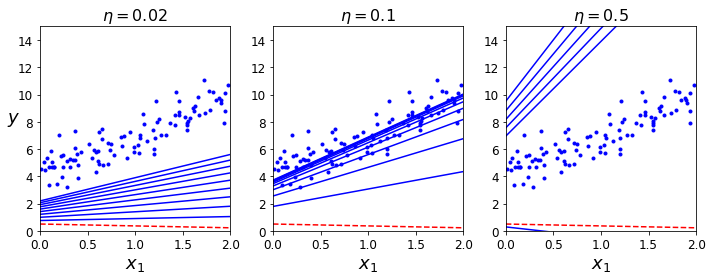

In [61]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

1. On the left, the learning rate is too low: the algorithm will eventually reach the solu‐ tion, but it will take a long time.

2. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution.

3. On the right, the learn‐ ing rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search. 
Grid-search method of hyperparametric tuning is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

To get the optimal no of iterations, set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ε (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum.

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while

#Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

On the other hand, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

This makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

Also, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. 

Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). 
So once the algorithm stops, the final parameter values are good, but not optimal.

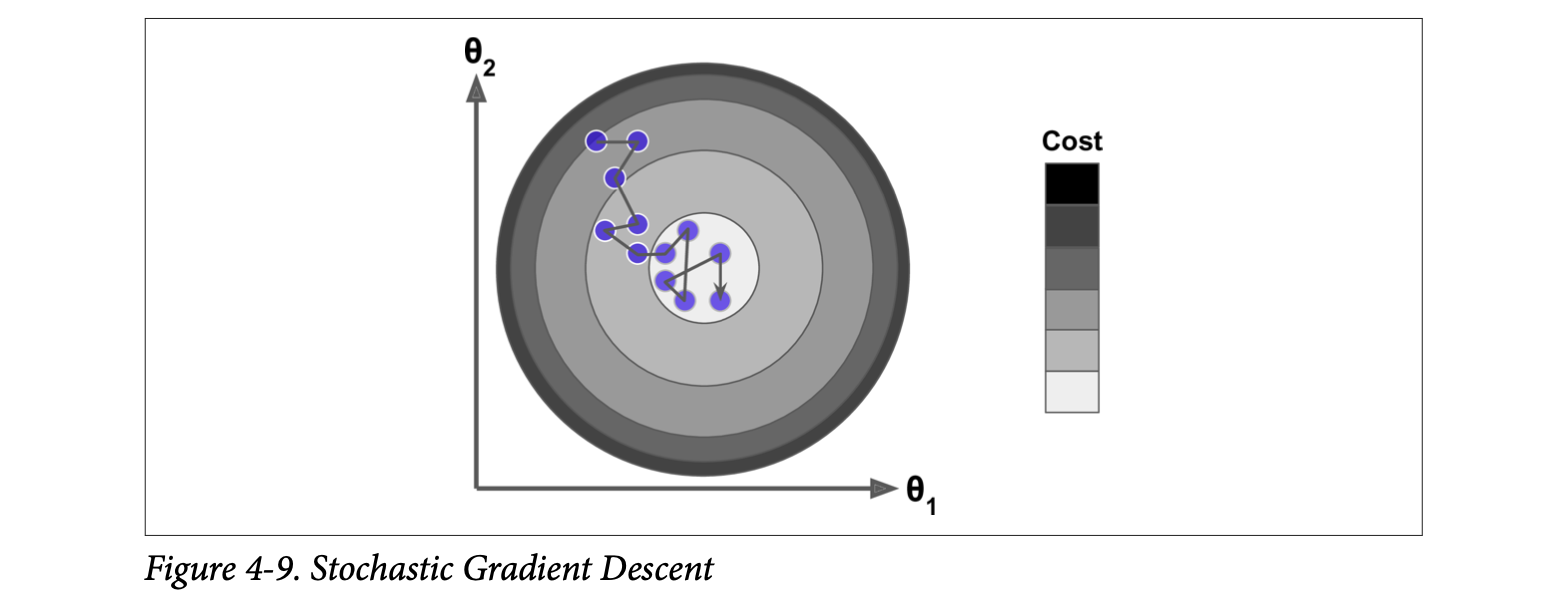

BENEFITS- randomness is good to escape from local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

DRAWBACKS- Due to its randomness, the algorithm can never settle at the minimum.

SOLUTION- One solution to this dilemma is to gradually reduce the learning rate.

Learning Schedule- The function that determines the learning rate at each iteration is called the learning schedule.

If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum.

If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [62]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

This code implements Stochastic Gradient Descent using a simple learning schedule:

Saving figure sgd_plot


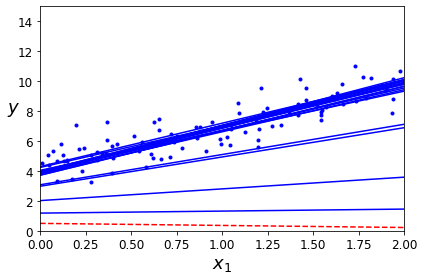

In [63]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()   

By convention we iterate by rounds of m iterations; each round is called an epoch.

While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution

In [64]:
theta

array([[4.21076011],
       [2.74856079]])

since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all.

If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch), then go through it instance by instance, then shuffle it again, and so on.

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe gressor class, which defaults to optimizing the squared error cost function. 

In [65]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [66]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

#Mini-batch Gradient Descent

Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD),
Mini- batch GD computes the gradients on small random sets of instances called mini- batches. 

Main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs (Graphic Processing Unit).



This algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima.


In [67]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [68]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [69]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


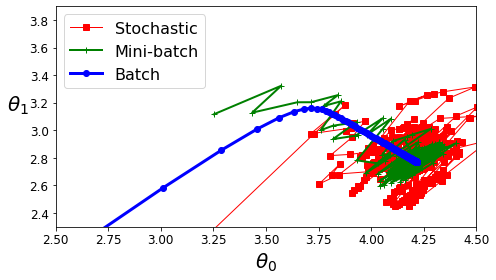

In [70]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

The figure shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around.


However, Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

#Polynomial Regression

If the data is actually more complex than a simple straight line, we can still use a linear model to fit nonlinear data. 

A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

First, let’s generate some nonlinear data, based on a simple quadratic equation y = ax2 + bx + c.

In [71]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [72]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


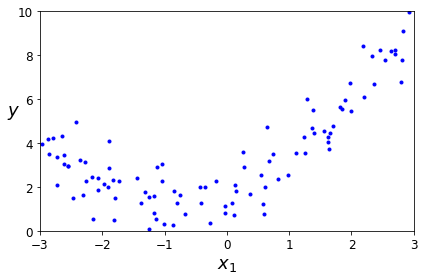

In [73]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

Now let’s use Scikit-Learn’s Poly nomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features.

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [75]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly now contains the original feature of X plus the square of this feature.

Now you can fit a LinearRegression model to this extended training data.

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


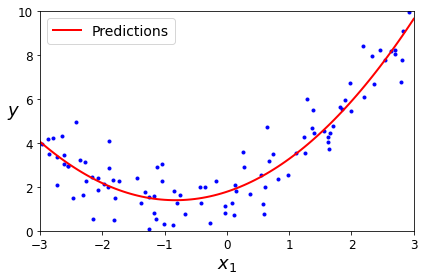

In [77]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Now an important thing to note is- when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree.

There are two ways to evaluate whether a model is over/underfitting-

1. Cross validation:
To get an estimate of a model’s generalization performance.
If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting.
If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

2. Learning curves: These are plots of the model’s performance on the training set and the validation set as a function of the training set size.

The following code defines a function that plots the learning curves of a model given some training data:

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


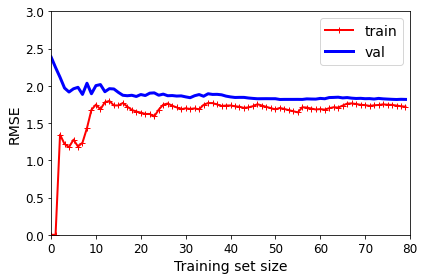

In [79]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show() 

First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. 

But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. 

So the error on the training data goes up until it reaches a plateau, at which point adding new instan‐ ces to the training set doesn’t make the average error much better or worse.

Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down.





These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.

SOLUTION- If your model is underfitting the training data, adding more training examples will not help. Instead we need to use a more complex model or come up with better features.

So, let’s look at the learning curves of a 10th-degree polynomial model on the same data

Saving figure learning_curves_plot


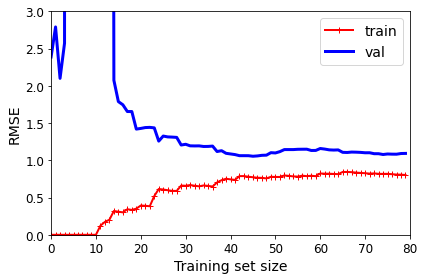

In [80]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

These learning curves show two very important differences:

• The error on the training data is much lower than with the Linear Regression model.


• There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model.

SOLUTION- to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

#The Bias/Variance Tradeoff (pdf)

#Regularized Linear Models

For a linear model, regularization is typically achieved by constraining the weights of the model.

This can be achieved by Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

#A. RIDGE REGRESSION

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term is added to the cost function.

This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible.

The regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

In [81]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression.

If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.


It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features.

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent.

#Ridge Regression with Scikit-Learn using closed-form solution

In [82]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [83]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


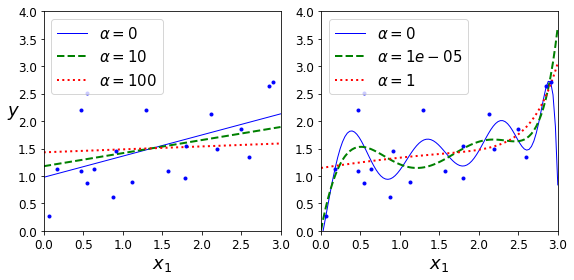

In [85]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

#Using Stochastic Gradient Descent

In [86]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

#Lasso Regression (Least Absolute Shrinkage and Selection Operator Regression)

It is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm


An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero)

Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


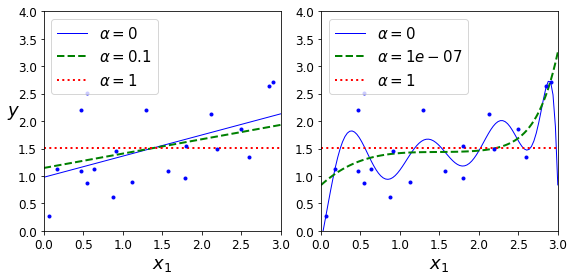

In [87]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

Here is a small Scikit-Learn example using the Lasso class.

In [88]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

We could instead use an SGDRegressor(penalty="l1")

In [89]:
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])



array([1.47011206])

#Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression.

The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r.

When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

#So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?

Ridge is a good default, but if you suspect that only a few features are actually useful, you should pre‐ fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed.


In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Using Scikit-Learn’s ElasticNet (l1_ratio corresponds to the mix ratio r):

In [90]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

#Early Stopping

To regularize iterative learning algorithms such as Gradient Descent- stop training as soon as the validation error reaches a minimum. This is called early stopping.

In [91]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Saving figure early_stopping_plot


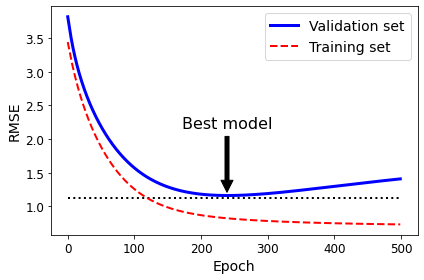

In [95]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

Figure shows a complex model (in this case a high-degree Polynomial Regression model) being trained using Batch Gradient Descent.

As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set.

After a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data.

With early stopping you just stop training as soon as the validation error reaches the minimum.

It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

Here is a basic implementation of early stopping:

In [96]:
from copy import deepcopy
# prepare the data

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Note that with warm_start=True, when the fit() method is called, it just continues training where it left off instead of restarting from scratch.